This notebook includes:



1)the WLS analysis of particulate and dissolved Pa, 


2)the F-statistic 

3)and the map.

In [9]:
import numpy as np
import numpy
import math
import os
import glob,csv
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline
nc_filename=sorted(glob.glob('*.csv'))
print("found *.csv file: \n{}".format(nc_filename))

found *.csv file: 
['60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 'test.csv']


In [10]:
WLS_err1=np.empty([5,1])
WLS_coef1=np.empty([5,1])
WLS_errc=np.empty([5,1])
WLS_coefc=np.empty([5,1])
sinking_rate=np.empty([5,1])

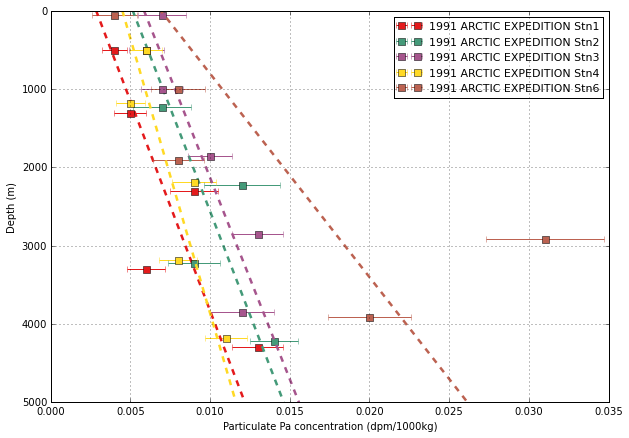

In [11]:
ax = plt.figure(1,figsize=(10,7))
for j in range(5):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    name= data['name'][0];
    x=data['231Pa part.'];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Pa_part_err']
    y2 = sm.add_constant(y,prepend=False)
    mod_wls = sm.WLS(x, y2, weights=1./err)
    res_wls = mod_wls.fit()
    
    WLS_err1[j,:] = res_wls.bse[0]
    WLS_coef1[j,:] = res_wls.params[0]
    sinking_rate[j,:]=0.00246/res_wls.params[0]
    

    ax = plt.subplot()
    ax.plot([0, 5000],[0, 5000]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], '--.',c=cm.Set1(j*50),linewidth=2.5)
    ax.errorbar(x, y,xerr=err, fmt='s',markersize=7,c=cm.Set1(j*50),label=name)
    ax.legend(loc=0,fontsize=11)
    
ax.set_ylim([0, 5000])
ax.set_xlim([0, 0.035])
plt.xlabel('Particulate Pa concentration (dpm/1000kg)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.grid()
plt.show()

In [12]:
#for j in range(5):
#    print j+1
#    print ('================')
#    print WLS_err1[j,:]
#    print WLS_coef1[j,:]
#    print (' ')
#    print WLS_errc[j,:]
#    print WLS_coefc[j,:]

In [13]:
WLS_err2=np.empty([5,1])
Kvalue=np.empty([5,1])
WLS_coef2=np.empty([5,1])

('1991 ARCTIC EXPEDITION Stn1', 'p_value', 0.011353774665871761)
('1991 ARCTIC EXPEDITION Stn2', 'p_value', 0.073495095774096686)
('1991 ARCTIC EXPEDITION Stn3', 'p_value', 0.0067473561316382154)
('1991 ARCTIC EXPEDITION Stn4', 'p_value', 0.020409724470785186)
('1991 ARCTIC EXPEDITION Stn6', 'p_value', 0.00087874970367368156)


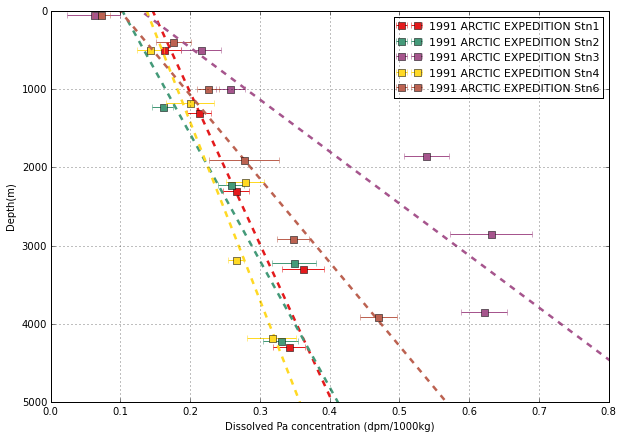

In [14]:
ax = plt.figure(1,figsize=(10,7))
for j in range(5):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    x= data['231Pa diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Pa_diss_err']
    y2 = sm.add_constant(y,prepend=False)
    mod_wls2 = sm.WLS(x, y2, weights=1./err)
    res_wls2 = mod_wls2.fit()
    
    WLS_err2[j,:] = res_wls2.bse[0]
    Kvalue[j,:]=1*res_wls.params[0]/res_wls2.params[0]
    WLS_coef2[j,:] = res_wls2.params[0]
    
    ax = plt.subplot()
    ax.plot([0, 5000],[0, 5000]/res_wls2.params[0]-res_wls2.params[1]/res_wls2.params[0], '--.',c=cm.Set1(j*50),linewidth=2.5)
    ax.errorbar(x, y,xerr=err, fmt='s',markersize=7,c=cm.Set1(j*50),label=name)
    ax.legend(loc=0,fontsize=11)
    #plt.xlabel('Sea ice concentration');plt.ylabel('Th_concerntration')
    #print ('Fig',j+1,'Pa K value:',Kvalue[j,:])
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 0.8])
    print (name,'p_value',res_wls2.pvalues[0])
plt.xlabel('Dissolved Pa concentration (dpm/1000kg)')
plt.ylabel('Depth(m)')
plt.grid() 
plt.gca().invert_yaxis()
plt.show()

# WLS: sinking rate and the ice concentration

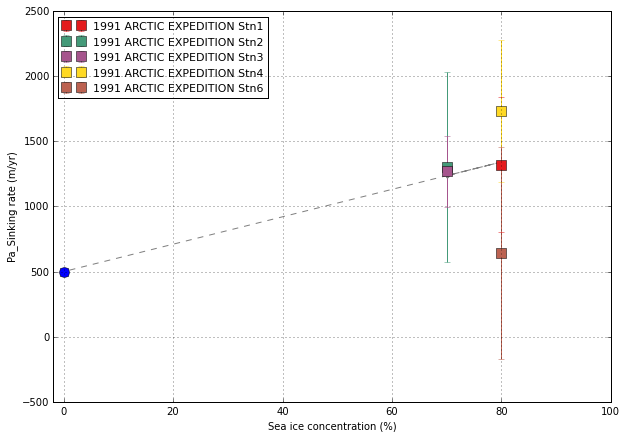

In [15]:
marker=['s','s','s','s','s','s']
i=np.empty([5,1])
for j in range(5):
    data=pd.read_csv(nc_filename[j])
    i[j,:]= data['ice'][0];

    
err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.00246
#((WLS_err1/WLS_coef1)**2)**(0.5)
sinking_rate=numpy.append(sinking_rate,500)
i=numpy.append(i,0)
err1=numpy.append(err1,0.01)
i2 = sm.add_constant(i,prepend=False)
mod_wls3 = sm.WLS(sinking_rate,i2,weights=1./err1) #Is it the real error?
res_wls3 = mod_wls3.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls3.fittedvalues, '--.',color='grey')
for j in range(5):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=cm.Set1(j*50),label=name)

ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue')
ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Pa_Sinking rate (m/yr)')

#ax.set_ylim([0, 5000])
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [16]:
print res_wls3.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            WLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     28.10
Date:                Tue, 19 May 2015   Prob (F-statistic):            0.00608
Time:                        11:22:24   Log-Likelihood:                -23.517
No. Observations:                   6   AIC:                             51.03
Df Residuals:                       4   BIC:                             50.62
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            10.5231      1.985      5.301      0.006         5.011    16.035
const        500.0003      1.493    334.936      0.0

# WLS: K value and the ice concentration

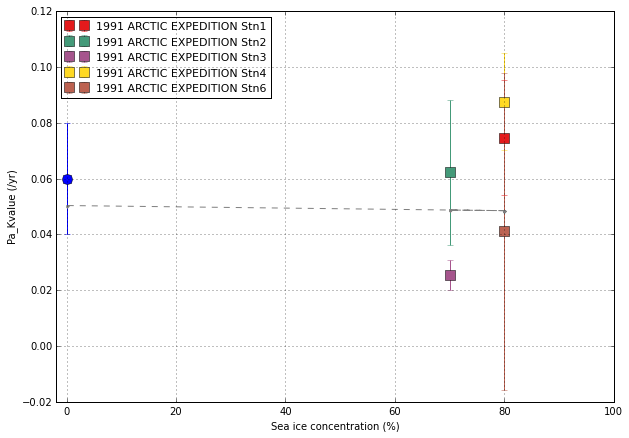

In [17]:
err2= ((WLS_err1/WLS_coef1)+(WLS_err2/WLS_coef2))* WLS_coef1/WLS_coef2# error of k value K-1=1
#(WLS_coef1**(-4)*(WLS_coef2**(-2))*(WLS_err1)**2+WLS_coef2**(-4)*(WLS_coef1**(-2))*(WLS_err2)**2)**(0.5)
#((WLS_err1/WLS_coef1)**2+(WLS_err2/WLS_coef2)**2)**(0.5) # error of k value K-1=1

Kvalue=numpy.append(Kvalue,0.06)#0.06
err2=numpy.append(err2,0.02)

mod_wls4 = sm.WLS(Kvalue, i2, weights=1./(err2*2))
res_wls4 = mod_wls4.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls4.fittedvalues,  '--.',color='grey')
for j in range(5):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Set1(j*50),label=name)
errorbar(i[-1],Kvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Pa_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [18]:
print res_wls4.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                 -0.249
Method:                 Least Squares   F-statistic:                  0.002193
Date:                Tue, 19 May 2015   Prob (F-statistic):              0.965
Time:                        11:22:24   Log-Likelihood:                 3.2880
No. Observations:                   6   AIC:                            -2.576
Df Residuals:                       4   BIC:                            -2.993
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1         -2.294e-05      0.000     -0.047      0.965        -0.001     0.001
const          0.0503      0.034      1.491      0.2

In [19]:
#print Kvalue
#print i2
#print err2

# F-statistic

Test how Prob>F will change with or without the slope.

In [20]:
import csv
with open('test.csv', 'w') as fp:
    a = csv.writer(fp, delimiter=',')
    data = [[0.07456859, 80,0.0206047,0.058],
            [0.06219916, 70,0.02596525, 0.058],
            [0.02554051, 70,0.00529631, 0.058],
            [0.08753997, 80,0.01738407, 0.058],
            [0.04107845, 80,0.05684211, 0.058],
            [0.06, 0,0.02 , 0.058]]
    a.writerows(data)

In [21]:
data=pd.read_csv('test.csv',header=None,names=['k','ice','err','k2'])
print data

          k  ice       err     k2
0  0.074569   80  0.020605  0.058
1  0.062199   70  0.025965  0.058
2  0.025541   70  0.005296  0.058
3  0.087540   80  0.017384  0.058
4  0.041078   80  0.056842  0.058
5  0.060000    0  0.020000  0.058


In [22]:
#help(anova_lm)

In [23]:
from scipy import stats
from statsmodels.stats.anova import anova_lm 
from statsmodels.formula.api import wls

anova_results=anova_lm(wls('k~C(ice)+C(k2)',data).fit())
print anova_results

          df    sum_sq   mean_sq         F    PR(>F)
C(ice)     2  0.000686  0.000343  0.564821  0.619175
C(k2)      0  0.000000       NaN       NaN       NaN
Residual   3  0.001821  0.000607       NaN       NaN


# Map

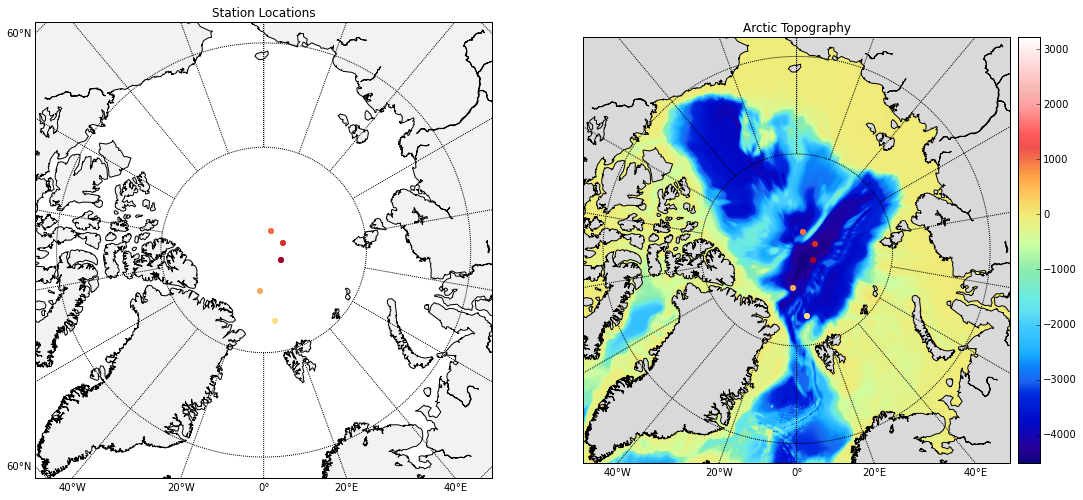

In [24]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(121)

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=68,lon_0=0,resolution='l')
for j in range(5):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.RdYlGn(j*25))
    
plt.title("Station Locations")
m.drawcoastlines()
m.fillcontinents(color = '0.95')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

ax = fig.add_subplot(122)
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)
m = Basemap(projection='npstere',boundinglat=68,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85')
m.drawparallels(np.arange(-80.,81.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

for j in range(5):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.RdYlGn(j*25))

nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)    
from mpl_toolkits.basemap import cm    
im = m.imshow(topodat,cm.GMT_haxby)
cb = m.colorbar(im,"right", size="5%", pad='2%')
plt.title("Arctic Topography")
plt.show()